In [ ]:
#Bensafi_Sarra
#M2 IA

In [171]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np



plt.ioff()

#########################################################################
# 1 - Analyse descriptive des données

# read input text and put data inside a data frame
fruits = pd.read_table('fruit_data_with_colors.txt')
print(fruits.head())
print ("nb of instances and features")
print(fruits.shape)

# print feature types
print(fruits.dtypes)

# print balance between classes
print(fruits.groupby('fruit_name').size())



   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79
nb of instances and features
(59, 7)
fruit_label        int64
fruit_name        object
fruit_subtype     object
mass               int64
width            float64
height           float64
color_score      float64
dtype: object
fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


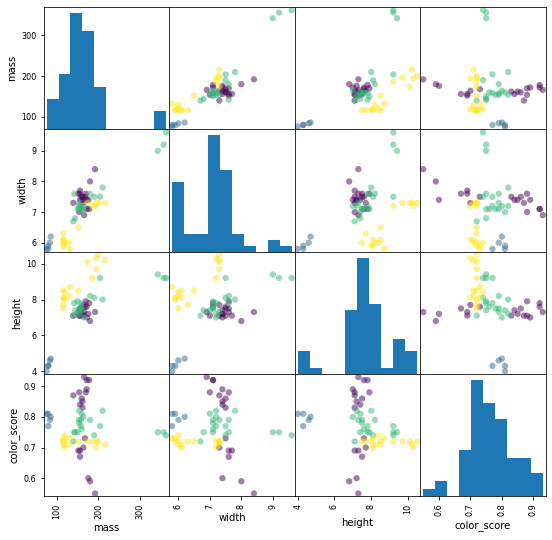

In [172]:
X = fruits[['mass','width','height','color_score']]
y = fruits['fruit_label']
pd.plotting.scatter_matrix(X, c = y, marker = 'o',s=40, figsize=(9,9))
plt.show()



<Figure size 432x288 with 0 Axes>

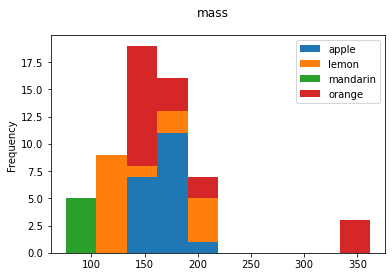

<Figure size 432x288 with 0 Axes>

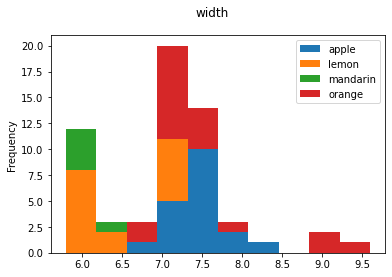

<Figure size 432x288 with 0 Axes>

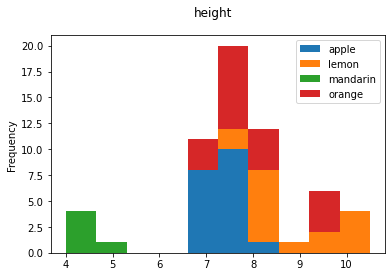

<Figure size 432x288 with 0 Axes>

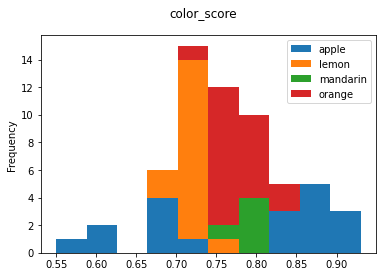

"\n\non peux voir pour ce feature mass on peut pas déduire beaucoup d'information sauf pour les mandarines quand la masse est en desoous de 100 \nou pour les oranges quand les mass est supérieure à 300.\n\n"

In [173]:
#print histogram for each attribute with belonging to classes
feature_names = ['mass', 'width', 'height', 'color_score']
for attr in feature_names:
    fig = plt.figure()
    pd.DataFrame({k: v for k, v in fruits.groupby('fruit_name')[attr]}).plot.hist(stacked=True)
    plt.suptitle(attr)
    plt.show()
    

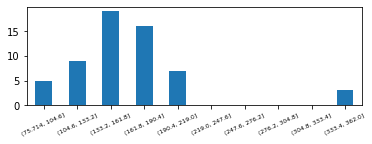

In [174]:
#discretize with equal-intervaled bins
attr='mass'
fig = plt.figure()
plt.subplot(211)
matplotlib.pyplot.xticks(fontsize=6)
pd.cut(fruits[attr],10).value_counts(sort=False).plot.bar()
plt.xticks(rotation=25)
plt.show()

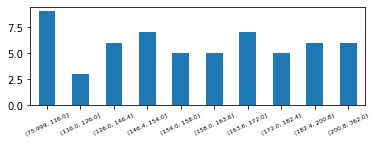

In [175]:
#discretize with equal-intervaled bins
fig = plt.figure()
plt.subplot(211)
matplotlib.pyplot.xticks(fontsize=6)
pd.qcut(fruits[attr],10).value_counts(sort=False).plot.bar()
plt.xticks(rotation=25)
plt.show()

In [176]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data=fruits[['mass','width','color_score']]
print(scaler.fit(data))
X_norm=scaler.transform(data)
print(X_norm)

'''
y = fruits[['fruit_label']]
print(scaler.fit(y))
y=scaler.transform(y)
print(y)'''

MinMaxScaler()
[[0.40559441 0.68421053 0.        ]
 [0.36363636 0.57894737 0.10526316]
 [0.34965035 0.42105263 0.13157895]
 [0.03496503 0.10526316 0.65789474]
 [0.02797203 0.05263158 0.63157895]
 [0.01398601 0.         0.57894737]
 [0.01398601 0.02631579 0.68421053]
 [0.         0.         0.68421053]
 [0.35664336 0.34210526 0.97368421]
 [0.33566434 0.42105263 0.89473684]
 [0.31468531 0.28947368 1.        ]
 [0.33566434 0.34210526 0.97368421]
 [0.27272727 0.31578947 0.86842105]
 [0.30769231 0.39473684 0.39473684]
 [0.26573427 0.47368421 0.36842105]
 [0.27972028 0.5        0.36842105]
 [0.27972028 0.47368421 0.31578947]
 [0.32167832 0.44736842 0.47368421]
 [0.3006993  0.44736842 0.73684211]
 [0.3006993  0.42105263 0.78947368]
 [0.29370629 0.44736842 0.81578947]
 [0.27972028 0.42105263 0.76315789]
 [0.22377622 0.39473684 0.84210526]
 [0.32867133 0.47368421 0.86842105]
 [0.93006993 0.84210526 0.52631579]
 [0.97902098 0.89473684 0.52631579]
 [1.         1.         0.5       ]
 [0.44755245 

"\ny = fruits[['fruit_label']]\nprint(scaler.fit(y))\ny=scaler.transform(y)\nprint(y)"

In [177]:
#Kmeans

from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Plot clusters
lst_kmeans = [KMeans(n_clusters=n) for n in range(3,6)]#ici on prend nombre de cluster 
titles = [str(x)+' clusters' for x in range(3,6)]
fignum = 1
for kmeans in lst_kmeans:
    fig = plt.figure(figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    kmeans.fit(X_norm)
    labels = kmeans.labels_
    ax.scatter(data['mass'], data['width'], data['color_score'],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('mass')
    ax.set_ylabel('width')
    ax.set_zlabel('color_score')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    plt.savefig('fig/k-means_'+str(2+fignum)+'_clusters')
    fignum = fignum + 1
    plt.close(fig)


C:\Users\DELL\AppData\Local\Temp\ipykernel_12368\3965352245.py:13: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12368\3965352245.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=labels.astype(np.float), edgecolor='k')
C:\Users\DELL\AppData\Local\Temp

In [178]:
# # Plot the ground truth
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
for label in fruits['fruit_name'].unique():
    ax.text3D(fruits.loc[fruits['fruit_name']==label].mass.mean(),
              fruits.loc[fruits['fruit_name']==label].width.mean(),
              fruits.loc[fruits['fruit_name']==label].color_score.mean(),
              label,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
ax.scatter(X['mass'], X['width'], X['color_score'], c=y, edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('mass')
ax.set_ylabel('width')
ax.set_zlabel('color_score')
ax.set_title('Ground Truth')
ax.dist = 12
plt.savefig('fig/k-means_ground_truth')
plt.close(fig)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12368\3437493227.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


In [179]:
# Plot the ground truth
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
for label in fruits['fruit_name'].unique():
    ax.text3D(fruits.loc[fruits['fruit_name']==label].mass.mean(),
              fruits.loc[fruits['fruit_name']==label].width.mean(),
              fruits.loc[fruits['fruit_name']==label].color_score.mean(),
              label,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
ax.scatter(X['mass'], X['width'], X['color_score'], c=y, edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('mass')
ax.set_ylabel('width')
ax.set_zlabel('color_score')
ax.set_title('Ground Truth')
ax.dist = 12
plt.savefig('fig/k-means_ground_truth')
plt.close(fig)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12368\1292561662.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


In [180]:
import numpy as np

# compute r square for clustering
def r_square(data,centroids,labels,q):
    """rsquare

    R-square is computed from between variance and within variance of clustered data. This score (between 0 and 1) can be used to evaluate clustering

    Args:
        data(numpy.ndarray): m*n matrix of the original data to cluster
        centroids(np.ndarray): q*n matrix of cluster centroids
        labels(nb.ndarray): m*1 array of cluster labels for each instance of data
        q(int): number of clusters
    Returns:
        float: R-square score
   
    """
    v_within = within_variance(data,centroids,labels,q)
    v_between = between_variance(data,centroids,labels,q)
    return v_between/(v_between+v_within)

# compute within variance
def within_variance(data,centroids,labels,q):
    res = 0.0
    for k in range(q):
        # get number of instances inside cluster k
        n_k = (labels==k).sum()

        # select rows of data associated with each cluster
        d_k = data[np.where(labels==k)]
        
        # sum squared distances between each point and its centroid
        sum = 0.0
        for vec_k in d_k:
            sum += np.sum(np.square(vec_k-centroids[k]))

        res += sum
    return res/len(data)


# compute between variance
def between_variance(data,centroids,labels,q):
    center = np.average(data,axis=0)

    res = 0.0
    
    for k in range(q):
        # get number of instances inside cluster k
        n_k = (labels==k).sum()

        # sum squared distances between global centroid and each cluster centroid
        res += n_k * np.sum(np.square(centroids[k]-center))

    return res/len(data)



# compute r square for clustering
def r_square(data,centroids,labels,q):
    v_within = within_variance(data,centroids,labels,q)
    v_between = between_variance(data,centroids,labels,q)
    return v_between/(v_between+v_within)
'''
def purity_score(y_true, y_pred):
   
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 
'''

'\ndef purity_score(y_true, y_pred):\n   \n    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)\n    # return purity\n    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) \n'

In [181]:
from sklearn.metrics import accuracy_score
import numpy as np
def purity_score(y_true, y_pred):
    """Purity score

    To compute purity, each cluster is assigned to the class which is most frequent 
    in the cluster [1], and then the accuracy of this assignment is measured by counting 
    the number of correctly assigned documents and dividing by the number of documents.
    We suppose here that the ground truth labels are integers, the same with the predicted clusters i.e
    the clusters index.

    Args:
        y_true(np.ndarray): n*1 matrix Ground truth labels
        y_pred(np.ndarray): n*1 matrix Predicted clusters
    
    Returns:
        float: Purity score
    
    References:
        [1] https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html
    """
    # matrix which will hold the majority-voted labels
    y_voted_labels = np.zeros(y_true.shape)
    # Ordering labels
    ## Labels might be missing e.g with set like 0,2 where 1 is missing
    ## First find the unique labels, then map the labels to an ordered set
    ## 0,2 should become 0,1
    labels = np.unique(y_true)
    ordered_labels = np.arange(labels.shape[0])
    for k in range(labels.shape[0]):
        y_true[y_true==labels[k]] = ordered_labels[k]
    # Update unique labels
    labels = np.unique(y_true)
    # We set the number of bins to be n_classes+2 so that 
    # we count the actual occurence of classes between two consecutive bin
    # the bigger being excluded [bin_i, bin_i+1[
    bins = np.concatenate((labels, [np.max(labels)+1]), axis=0)

    for cluster in np.unique(y_pred):
        hist, _ = np.histogram(y_true[y_pred==cluster], bins=bins)
        # Find the most present label in the cluster
        winner = np.argmax(hist)
        y_voted_labels[y_pred==cluster] = winner
    
    return accuracy_score(y_true, y_voted_labels)

In [182]:
# Plot elbow graphs for KMeans using R square and purity scores
lst_k=range(2,11)
lst_rsq = []
lst_purity = []
for k in lst_k:
    est=KMeans(n_clusters=k)
    est.fit(X_norm)
    lst_rsq.append(r_square(X_norm, est.cluster_centers_,est.labels_,k))
    lst_purity.append(purity_score(y,est.labels_))# TODO: complete lst_purity
    
    
fig = plt.figure()
plt.plot(lst_k, lst_rsq, 'bx-')
plt.plot(lst_k, lst_purity, 'rx-')
plt.xlabel('k')
plt.ylabel('RSQ/purity score')
plt.title('The Elbow Method showing the optimal k')
plt.savefig('fig/k-means_elbow_method')
plt.close()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12368\3522036382.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true[y_true==labels[k]] = ordered_labels[k]
C:\Users\DELL\AppData\Local\Temp\ipykernel_12368\3522036382.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true[y_true==labels[k]] = ordered_labels[k]
C:\Users\DELL\AppData\Local\Temp\ipykernel_12368\3522036382.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true[y

In [183]:
# hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

lst_labels = list(map(lambda pair: pair[0]+str(pair[1]), zip(fruits['fruit_name'].values,fruits.index)))
linkage_matrix = linkage(X_norm, 'ward')
fig = plt.figure()
dendrogram(
    linkage_matrix,
    color_threshold=0,
    labels=lst_labels
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.savefig('fig/hierarchical-clustering')
plt.close()

In [184]:


from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


# Create Training and Test Sets and Apply Scaling
# by default test data represents 25%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)#le % par défaut est déja coupé avec 25 % 75%

# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



dummycl = DummyClassifier(strategy="most_frequent")
gmb = GaussianNB()
dectree = tree.DecisionTreeClassifier()
rdforest = RandomForestClassifier()
logreg = LogisticRegression()

lst_classif = [dummycl, gmb, dectree, rdforest, logreg]
lst_classif_names = ['Dummy', 'Naive Bayes', 'Decision tree', 'Random Forest', 'Logistic regression']

for clf,name_clf in zip(lst_classif,lst_classif_names):
    clf.fit(X_train, y_train)
    # TODO
    y_pred =  clf.predict(X_test)

    print('Accuracy of '+name_clf+' classifier on training set: {:.2f}'
          .format(clf.score(X_train, y_train)))
    print('Accuracy of '+name_clf+' classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
    print(confusion_matrix(y_test, y_pred))
    
# print decision tree
from sklearn import tree
fig = plt.figure(num=None, figsize=(10, 8), dpi=300)
tree.plot_tree(dectree,  
               feature_names=feature_names,  
               class_names=fruits['fruit_name'].unique(),  
               filled=True, rounded=True)
plt.savefig('fig/decision_tree')
plt.close(fig)

Accuracy of Dummy classifier on training set: 0.34
Accuracy of Dummy classifier on test set: 0.27
[[4 0 0 0]
 [1 0 0 0]
 [8 0 0 0]
 [2 0 0 0]]
Accuracy of Naive Bayes classifier on training set: 0.86
Accuracy of Naive Bayes classifier on test set: 0.67
[[4 0 0 0]
 [0 1 0 0]
 [4 0 3 1]
 [0 0 0 2]]
Accuracy of Decision tree classifier on training set: 1.00
Accuracy of Decision tree classifier on test set: 0.87
[[4 0 0 0]
 [0 1 0 0]
 [2 0 6 0]
 [0 0 0 2]]
Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.87
[[4 0 0 0]
 [0 1 0 0]
 [1 0 6 1]
 [0 0 0 2]]
Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.47
[[4 0 0 0]
 [1 0 0 0]
 [6 0 1 1]
 [0 0 0 2]]


In [185]:
#CrossValidation
from sklearn.model_selection import cross_val_score

for clf,name_clf in zip(lst_classif,lst_classif_names):
   
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print("Accuracy of "+name_clf+" classifier on cross-validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


H:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
H:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
H:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
H:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Accuracy of Dummy classifier on cross-validation: 0.34 (+/- 0.03)
Accuracy of Naive Bayes classifier on cross-validation: 0.79 (+/- 0.22)
Accuracy of Decision tree classifier on cross-validation: 0.84 (+/- 0.12)
Accuracy of Random Forest classifier on cross-validation: 0.96 (+/- 0.11)
Accuracy of Logistic regression classifier on cross-validation: 0.66 (+/- 0.12)


H:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [186]:
from sklearn.model_selection import GridSearchCV

parameters={"C":[-3,0.01,0.05,0.1,0.15,1,3,7,10], "penalty":['l2','l1']}

lr = LogisticRegression() 
search = GridSearchCV(LogisticRegression(), parameters, cv=5, verbose=1)

search.fit(X_train, y_train)
print("Best score: %0.3f" % search.best_score_)
print("Best parameters set:")
best_parameters = search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


H:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best score: 0.772
Best parameters set:
	C: 7
	penalty: 'l2'


H:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "H:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "H:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1464, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)" % self.C)
ValueError: Penalty term must be positive; got (C=-3)

--------------------------------------------------------------------------------
45 fits failed with the following 

In [187]:


list_prefix = ['eqsized_bins_', 'eqintervaled_bins_']
nb_bin = 10
for prefix in list_prefix:
    print("###### Discretization with "+prefix+" ######")
    
    for attr in feature_names:
        if 'sized' in prefix:
            fruits[prefix+attr]=pd.qcut(fruits[attr],nb_bin)
        else:
            fruits[prefix+attr]=pd.cut(fruits[attr],nb_bin)
        # use pd.concat to join the new columns with your original dataframe
        fruits=pd.concat([fruits,pd.get_dummies(fruits[prefix+attr],prefix=prefix+attr)],axis=1)
        # now drop the original column (you don't need it anymore)
        fruits.drop(prefix+attr,axis=1, inplace=True)

    feature_names_bins = filter(lambda x: x.startswith(prefix) and x.endswith(']'), list(fruits))
    X_discret = fruits[feature_names_bins]
    print(X_discret.head())
    
    

    

###### Discretization with eqsized_bins_ ######
   eqsized_bins_mass_(75.999, 116.0]  eqsized_bins_mass_(116.0, 126.0]  \
0                                  0                                 0   
1                                  0                                 0   
2                                  0                                 0   
3                                  1                                 0   
4                                  1                                 0   

   eqsized_bins_mass_(126.0, 146.4]  eqsized_bins_mass_(146.4, 154.0]  \
0                                 0                                 0   
1                                 0                                 0   
2                                 0                                 0   
3                                 0                                 0   
4                                 0                                 0   

   eqsized_bins_mass_(154.0, 158.0]  eqsized_bins_mass_(158.0, 163.6

In [190]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Create Training and Test Sets and Apply Scaling
# by default test data represents 25%
from sklearn.model_selection import train_test_split
X_train_dis, X_test_dis, y_train_dis, y_test_dis = train_test_split(X_discret, y, random_state=0)#le % par défaut est déja coupé avec 25 % 75%

X_train_dis=scaler.fit_transform(X_train_dis)
X_test_dis=scaler.transform(X_test_dis)



dummycl = DummyClassifier(strategy="most_frequent")
gmb = GaussianNB()
dectree = tree.DecisionTreeClassifier()
rdforest = RandomForestClassifier()
logreg = LogisticRegression()

lst_classif = [dummycl, gmb, dectree, rdforest, logreg]
lst_classif_names = ['Dummy', 'Naive Bayes', 'Decision tree', 'Random Forest', 'Logistic regression']

for clf,name_clf in zip(lst_classif,lst_classif_names):
    clf.fit(X_train_dis, y_train_dis)
    y_pred_dis =  clf.predict(X_test_dis)

    print('Accuracy of '+name_clf+' classifier on training set: {:.2f}'
          .format(clf.score(X_train_dis, y_train_dis)))
    print('Accuracy of '+name_clf+' classifier on test set: {:.2f}'
     .format(clf.score(X_test_dis, y_test_dis)))
    print(confusion_matrix(y_test_dis, y_pred_dis))
    

Accuracy of Dummy classifier on training set: 0.34
Accuracy of Dummy classifier on test set: 0.27
[[4 0 0 0]
 [1 0 0 0]
 [8 0 0 0]
 [2 0 0 0]]
Accuracy of Naive Bayes classifier on training set: 0.95
Accuracy of Naive Bayes classifier on test set: 0.80
[[4 0 0 0]
 [0 1 0 0]
 [1 0 5 2]
 [0 0 0 2]]
Accuracy of Decision tree classifier on training set: 1.00
Accuracy of Decision tree classifier on test set: 0.73
[[4 0 0 0]
 [0 1 0 0]
 [1 0 5 2]
 [1 0 0 1]]
Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.67
[[4 0 0 0]
 [0 1 0 0]
 [2 0 4 2]
 [1 0 0 1]]
Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 0.67
[[4 0 0 0]
 [0 1 0 0]
 [2 0 3 3]
 [0 0 0 2]]


In [1]:
from sklearn.model_selection import GridSearchCV

parameters={"C":[-3,0.01,0.05,0.1,0.15,1,3,7,10], "penalty":['l2','none']}

lr = LogisticRegression() 
search = GridSearchCV(lr, parameters, cv=5, verbose=1)

search.fit(X_train_dis, y_train_dis)
print("Best score: %0.3f" % search.best_score_)
print("Best parameters set:")
best_parameters = search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

NameError: name 'LogisticRegression' is not defined

In [192]:
# ACP et sélection de variables

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits['fruit_name']

sc=StandardScaler()
X_norm=pd.DataFrame(sc.fit_transform(X_fruits), columns=X_fruits.columns)
X_norm.head()




#Afficher les composante principale et le nombre 
acp = PCA(svd_solver='full')
acp.fit_transform(X_norm)


#print(acp.fit_transform(X_trans)) #les nouvelles composantes
# nb of computed components
print(acp.n_components_) 



4


In [193]:
'''
La variance expliquée représente l'information expliquée à
l'aide de différentes composantes principales (vecteurs propres)
'''

# explained variance scores [valeurs propres]
exp_var_pca = acp.explained_variance_ratio_
print(exp_var_pca)
#
# Cumulative sum of explained variance values; This will be used to
# create step plot for visualizing the variance explained by each
# principal component.
#
cum_sum_expl_var = np.cumsum(exp_var_pca)
print(cum_sum_expl_var)#ici on somme les valeurs propres , une fois on somme par exemple les 3 première et on atteint 80% on déduit qu'on a l'essentielle de nos information contenu dans les anciens attribut

#Ici les vecteur propres
print(acp.components_)

#
# Create the visualization plot
#
fig = plt.figure()
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_expl_var)), cum_sum_expl_var, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('fig/acp_expl_var')
plt.close(fig)

[0.57845054 0.25650171 0.14402362 0.02102413]
[0.57845054 0.83495225 0.97897587 1.        ]
[[ 0.6264132   0.57799922  0.49626726 -0.16505215]
 [ 0.19538115  0.25480203 -0.23856702  0.91650854]
 [ 0.1010637   0.47250483 -0.79781474 -0.36057865]
 [ 0.74780936 -0.61459907 -0.2455529  -0.05246823]]


In [194]:
# print correlations between factors and original variables
n = np.size(X_norm, 0)
p = np.size(X_norm, 1)
eigval = float(n-1)/n*exp_var_pca
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
print(corvar)


# plot correlation_circles
def correlation_circle(df,nb_var,x_axis,y_axis):
    fig, axes = plt.subplots(figsize=(8,8))
    axes.set_xlim(-1,1)
    axes.set_ylim(-1,1)
    # label with variable names
    for j in range(nb_var):
        plt.annotate(df.columns[j+2],(corvar[j,x_axis],corvar[j,y_axis]))
        axes.arrow(0, 0, corvar[j,x_axis],corvar[j,y_axis], head_width=0.03, head_length=0.05, fc='k', ec='k')
    # axes
    plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
    plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
    # add a circle
    cercle = plt.Circle((0,0),1,color='blue',fill=False)
    axes.add_artist(cercle)
    plt.savefig('fig/acp_correlation_circle_axes_'+str(x_axis)+'_'+str(y_axis))
    plt.close(fig)
correlation_circle(fruits,p,0,1)
correlation_circle(fruits,p,0,2)

[[ 0.47236967  0.09811057  0.0380277   0.10750729]
 [ 0.43586135  0.12794874  0.17779155 -0.08835658]
 [ 0.37422839 -0.11979633 -0.30019739 -0.03530141]
 [-0.12446358  0.4602244  -0.13567657 -0.00754299]]


In [195]:
# plot instances on the first plan (first 2 factors)
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
for i in range(n):
    plt.annotate(y.values[i],(coord[i,0],coord[i,1]))
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
plt.savefig('fig/acp_instances_1st_plan')
plt.close(fig)

In [199]:
#Variance is a measure of how data points differ from the mean
print("Performace avec deux attributs n=2")
fruits = pd.read_table('fruit_data_with_colors.txt')
X_ = fruits[['mass','width']]
y_= fruits['fruit_name']


from sklearn.model_selection import train_test_split
X_train_2att, X_test_2att, y_train_2att, y_test_2att = train_test_split(X_, y_, random_state=0)#le % par défaut est déja coupé avec 25 % 75%
lst_classif = [dummycl, gmb, dectree, rdforest, logreg]
lst_classif_names = ['Dummy', 'Naive Bayes', 'Decision tree', 'Random Forest', 'Logistic regression']

for clf,name_clf in zip(lst_classif,lst_classif_names):
   
    scores = cross_val_score(clf, X_train_2att, y_train_2att, cv=5)
    print("Accuracy of "+name_clf+" classifier on cross-validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


print("********************")

print("Performace avec Acp deux composantes n=2")
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_t=pd.DataFrame(sc.fit_transform(X_fruits), columns=X_fruits.columns)
X_t.head()
pca_2=PCA(n_components=2)
X__acp=pca_2.fit_transform(X_t)


#X_train_acp, X_test_acp, y_train_acp, y_test_acp = train_test_split(X__acp, y_, random_state=0)


lst_classif = [dummycl, gmb, dectree, rdforest, logreg]
lst_classif_names = ['Dummy', 'Naive Bayes', 'Decision tree', 'Random Forest', 'Logistic regression']

for clf,name_clf in zip(lst_classif,lst_classif_names):
   
    scores = cross_val_score(clf, X_train_acp, y_train_acp, cv=5)
    print("Accuracy of "+name_clf+" classifier on cross-validation: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Performace avec deux attributs n=2
Accuracy of Dummy classifier on cross-validation: 0.34 (+/- 0.03)
Accuracy of Naive Bayes classifier on cross-validation: 0.70 (+/- 0.45)
Accuracy of Decision tree classifier on cross-validation: 0.75 (+/- 0.19)


H:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
H:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
H:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
H:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Accuracy of Random Forest classifier on cross-validation: 0.78 (+/- 0.13)
Accuracy of Logistic regression classifier on cross-validation: 0.72 (+/- 0.36)
********************
Performace avec Acp deux composantes n=2
Accuracy of Dummy classifier on cross-validation: 0.34 (+/- 0.03)

H:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
H:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
H:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please 


Accuracy of Naive Bayes classifier on cross-validation: 0.71 (+/- 0.17)
Accuracy of Decision tree classifier on cross-validation: 0.80 (+/- 0.35)


H:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
H:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
H:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Accuracy of Random Forest classifier on cross-validation: 0.77 (+/- 0.37)
Accuracy of Logistic regression classifier on cross-validation: 0.50 (+/- 0.25)


H:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
# Variable selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
selector = SelectKBest(mutual_info_classif, k=2)
X_select = selector.fit_transform(X_norm, y)
print('selected features: ')
# TODO
print('*** Results for the 2 attributes selected with mutual_info_classif ***')
# TODO
